# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Naufal Adani
- **Email:** mnaufaladani2143@gmail.com
- **ID Dicoding:** mnaufaladani

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan tingkat polutan total antar stasiun?
2. Bagaimana perbandingan tiap polutan pada tiap stasiun?
3. Bagaimana pengaruh kondisi lingkungan terhadap tingkat polutan?
4. Bagaimana fluktuasi tingkat polutan sepanjang waktu?
5. Bagaimana distribusi stasiun berdasarkan tingkat polutan dan kondisi lingkungan? (Cluster)

## Import Semua Packages/Library yang Digunakan

Import Library

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from sklearn.preprocessing import StandardScaler
from google.colab import drive

## Data Wrangling

### Gathering Data

#### Load Tabel Stasiun Aotizhongxin

In [448]:
Aotizhongxin_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Load Tabel Stasiun Changping

In [449]:
Changping_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Changping_20130301-20170228.csv')
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


#### Load Tabel Stasiun Dingling

In [450]:
Dingling_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Dingling_20130301-20170228.csv')
Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


#### Load Tabel Stasiun Dongsi

In [451]:
Dongsi_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Dongsi_20130301-20170228.csv')
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


#### Load Tabel Stasiun Guanyuan

In [452]:
Guanyuan_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Guanyuan_20130301-20170228.csv')
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


#### Load Tabel Stasiun Gucheng

In [453]:
Gucheng_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Gucheng_20130301-20170228.csv')
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


#### Load Tabel Stasiun Huairou

In [454]:
Huairou_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Huairou_20130301-20170228.csv')
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


#### Load Tabel Stasiun Nongzhanguan

In [455]:
Nongzhanguan_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


#### Load Tabel Stasiun Shunyi

In [456]:
Shunyi_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Shunyi_20130301-20170228.csv')
Shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


#### Load Tabel Stasiun Tiantan

In [457]:
Tiantan_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Tiantan_20130301-20170228.csv')
Tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


#### Load Tabel Stasiun Wanliu

In [458]:
Wanliu_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Changping_20130301-20170228.csv')
Wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


#### Load Tabel Stasiun Wanshouxigong

In [459]:
Wanshouxigong_df = pd.read_csv('/content/gdrive/MyDrive/data_colab/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
Wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing Data

#### Menilai Data Aotizhongxin_df

In [460]:
Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [461]:
Aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [462]:
print("Jumlah duplikasi: ", Aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [463]:
Aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Menilai Data Changping_df

In [464]:
Changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [465]:
Changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [466]:
print("Jumlah duplikasi: ", Changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [467]:
Changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Menilai Data Dingling_df

In [468]:
Dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [469]:
Dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [470]:
print("Jumlah duplikasi: ", Dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [471]:
Dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Menilai Data Dongsi_df

In [472]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [473]:
Dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [474]:
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [475]:
Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Data Guanyuan_df

In [476]:
Guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [477]:
Guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [478]:
print("Jumlah duplikasi: ", Guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


In [479]:
Guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Menilai Data Gucheng_df

In [480]:
Gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [481]:
Gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [482]:
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


In [483]:
Gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Menilai Data Huairou_df

In [484]:
Huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [485]:
Huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [486]:
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())

Jumlah duplikasi:  0


In [487]:
Huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


#### Menilai Data Nongzhanguan_df

In [488]:
Nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [489]:
Nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [490]:
print("Jumlah duplikasi: ", Nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


In [491]:
Nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Data Shunyi_df

In [492]:
Shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [493]:
Shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [494]:
print("Jumlah duplikasi: ", Shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [495]:
Shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### Menilai Data Tiantan_df

In [496]:
Tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [497]:
Tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [498]:
print("Jumlah duplikasi: ", Tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [499]:
Tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Data Wanliu_df

In [500]:
Wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [501]:
Wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [502]:
print("Jumlah duplikasi: ", Wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [503]:
Wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Menilai Data Wanshouxigong_df

In [504]:
Wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [505]:
Wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [506]:
print("Jumlah duplikasi: ", Wanshouxigong_df.duplicated().sum())

Jumlah duplikasi:  0


In [507]:
Wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


### Cleaning Data

#### Membersihkan Data Aotizhongxin_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [508]:
# Menghilangkan duplicate data
Aotizhongxin_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [509]:
print("Jumlah duplikasi: ", Aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [510]:
# Metode interpolasi
Aotizhongxin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Aotizhongxin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Aotizhongxin_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Aotizhongxin_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [511]:
Aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Changping_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [512]:
# Menghilangkan duplicate data
Changping_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [513]:
print("Jumlah duplikasi: ", Changping_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [514]:
# Metode interpolasi
Changping_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Changping_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Changping_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Changping_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [515]:
Aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Dingling_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [516]:
# Menghilangkan duplicate data
Dingling_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [517]:
print("Jumlah duplikasi: ", Dingling_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [518]:
# Metode interpolasi
Dingling_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Dingling_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Dingling_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Dingling_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [519]:
Aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Dongsi_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [520]:
# Menghilangkan duplicate data
Dongsi_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [521]:
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [522]:
# Metode interpolasi
Dongsi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Dongsi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Dongsi_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Dongsi_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [523]:
Dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Guanyuan_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [524]:
# Menghilangkan duplicate data
Guanyuan_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [525]:
print("Jumlah duplikasi: ", Guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [526]:
# Metode interpolasi
Guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Guanyuan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Guanyuan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [527]:
Guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Gucheng_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [528]:
# Menghilangkan duplicate data
Gucheng_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [529]:
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.
- Untuk variabel NO2 pada data ini dilakukan backward fill karena terdapat missing value pada awal data yang membuatnya tidak dapat digunakan metode interpolasi.

In [530]:
# Metode interpolasi
Gucheng_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Gucheng_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Gucheng_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Gucheng_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

# Metode backward fill
Gucheng_df[['NO2']] = Gucheng_df[['NO2']].fillna(method='bfill')

Memastikan pembersihan missing value telah tersebut berhasil

In [531]:
Gucheng_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Huairou_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [532]:
# Menghilangkan duplicate data
Huairou_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [533]:
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [534]:
# Metode interpolasi
Huairou_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Huairou_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Huairou_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Huairou_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [535]:
Guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Nongzhanguan_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [536]:
# Menghilangkan duplicate data
Nongzhanguan_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [537]:
print("Jumlah duplikasi: ", Nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [538]:
# Metode interpolasi
Nongzhanguan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Nongzhanguan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Nongzhanguan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Nongzhanguan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [539]:
Nongzhanguan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Shunyi_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [540]:
# Menghilangkan duplicate data
Shunyi_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [541]:
print("Jumlah duplikasi: ", Shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [542]:
# Metode interpolasi
Shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Shunyi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Shunyi_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Shunyi_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [543]:
Shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Tiantan_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [544]:
# Menghilangkan duplicate data
Tiantan_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [545]:
print("Jumlah duplikasi: ", Tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [546]:
# Metode interpolasi
Tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Tiantan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Tiantan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [547]:
Tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Wanliu_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [548]:
# Menghilangkan duplicate data
Wanliu_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [549]:
print("Jumlah duplikasi: ", Wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [550]:
# Metode interpolasi
Wanliu_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Wanliu_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Wanliu_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Wanliu_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [551]:
Wanliu_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

#### Membersihkan Data Wanshouxigong_df

##### Menghilangkan duplicate data

Pada data ini tidak terdapat duplicate data seperti yang telah ditampilkan pada tahap assessing data, namun akan tetap kita pastikan kembali tidak ada duplicate

In [552]:
# Menghilangkan duplicate data
Wanshouxigong_df.drop_duplicates(inplace=True)

Memastikan tidak ada duplicate data

In [553]:
print("Jumlah duplikasi: ", Wanshouxigong_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani missing value

Pada data ini terdapat missing value pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

- Untuk variabel PM2.5, PM10, SO2, NO2, CO, dan O3 digunakan metode yang paling cocok yaitu interpolasi.
- Untuk variabel TEMP, PRES, DEWP, RAIN, wd, dan WSPM digunakan metode yang paling cocok yaitu forward fill.

In [554]:
# Metode interpolasi
Wanshouxigong_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = Wanshouxigong_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

# Metode forward fill
Wanshouxigong_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']] = Wanshouxigong_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].fillna(method='ffill')

Memastikan pembersihan missing value telah tersebut berhasil

In [555]:
Wanshouxigong_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Menangani inacurate value

Pada data ini tidak ditemukan keanehan pada ringkasan parameter statistiknya sehingga tidak diperlukan cleaning data untuk inacurate value

## Exploratory Data Analysis (EDA)

### Explore Data all_df

#### Penggabungan seluruh DataFrame

Proses ini dilakukan untuk mempermudah tahapan analisis

##### Penggabungan dataframe

In [556]:
# List semua dataframe
list_df = [Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df, Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df, Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df]

# Gabungkan semua dataframe
all_df = pd.concat(list_df, ignore_index=True)

##### Gathering data

Load tabel all_df

In [557]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


##### Assessing data

Pengecekan missing value

In [558]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Pengecekan duplikasi data dan ringkasan parameter statistik

In [559]:
print("Jumlah duplikasi: ",all_df.duplicated().sum())

all_df.describe()

Jumlah duplikasi:  35064


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420766.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,78.799621,103.583661,15.624219,48.810718,1221.368405,58.160112,13.552178,1010.475885,2.334364,0.063776,1.759186
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.199976,91.681020,21.745460,34.216271,1149.518489,57.034964,11.440099,10.495269,13.810607,0.808507,1.261501
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,2.000000,22.000000,500.000000,12.000000,3.100000,1002.000000,-9.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,81.000000,7.000000,41.000000,900.000000,46.000000,14.500000,1010.000000,2.900000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,144.000000,19.000000,68.642362,1500.000000,82.000000,23.300000,1018.800000,15.000000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


##### Cleaning data

DataFrame all_df memiliki missing value pada variabel 'NO2' dan 'time'. Sama seperti sebelumnya, 'NO2' akan menggunakan metode interpolasi, sedangkan 'time' merupakan variabel baru yang muncul setelah dataframe digabungkan dan tidak akan digunakan dalam proses selanjutnya maka 'time' dapat diabaikan.

In [560]:
# Metode interpolasi
all_df[['NO2']] = all_df[['NO2']].interpolate(method='linear')

Pengecekan missing value

In [561]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Explore variabel polutan dan stasiun

In [562]:
# Mendefinisikan variabel
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
stations = ['Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

# Memuat pivot table dengan 'station' sebagai indeks dan rata-rata untuk setiap polutan
pivot_table = all_df.pivot_table(index='station', values=pollutants, aggfunc='mean')

print(pivot_table)

                        CO        NO2         O3        PM10      PM2.5  \
station                                                                   
Aotizhongxin   1264.692405  59.074106  55.328626  110.210033  82.540623   
Changping      1156.990246  44.206153  57.976253   94.788575  70.986438   
Dingling        925.111838  27.304331  70.530792   84.113713  66.845557   
Dongsi         1331.913045  53.953078  57.700357  110.347617  86.144243   
Guanyuan       1258.327045  58.139298  54.817142  109.372349  82.897522   
Gucheng        1338.100060  55.822315  58.000001  119.261567  84.074802   
Huairou        1019.671871  32.077275  60.872173   92.422670  69.501747   
Nongzhanguan   1327.767611  58.095053  58.432876  109.384022  85.079472   
Shunyi         1197.904660  44.094695  54.218810   99.271936  79.437962   
Tiantan        1305.333262  53.258828  56.148077  106.537076  82.033097   
Wanshouxigong  1373.618569  55.495402  55.919979  112.505795  85.067548   

                     SO2

#### Explore variabel lingkungan dan polutan

Analisis ini dilakukan untuk mengetahui hubungan antara variabel polutan ('PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3') dengan variabel lingkungan ('TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'). Output dari analisis ini dapat digunakan untuk mengetahui korelasi antar variabel.

In [563]:
# Mendefinisikan variabel
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
environmental_conditions = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Buat pivot table dengan 'environmental_conditions' sebagai indeks dan rata-rata untuk setiap polutan
pivot_table = all_df.pivot_table(index=environmental_conditions, values=pollutants, aggfunc='mean')

print(pivot_table)

                                          CO        NO2          O3  \
TEMP  PRES   DEWP  RAIN wd  WSPM                                      
-19.9 1033.6 -28.6 0.0  NNE 1.0   300.000000   4.000000   44.000000   
-19.7 1034.3 -28.4 0.0  WSW 0.8   400.000000   6.000000   44.000000   
-19.5 1033.8 -28.7 0.0  NW  1.4   400.000000   7.000000   42.000000   
-18.9 1034.8 -30.3 0.0  NE  1.1   300.000000   2.000000   46.000000   
-18.7 1032.9 -28.7 0.0  SE  1.0   700.000000  20.000000   29.000000   
...                                      ...        ...         ...   
 40.9 989.1   3.3  0.0  WNW 1.4   400.000000  30.000000  199.000000   
 41.0 987.9  -1.6  0.0  NNW 2.7   166.666667  10.000000  139.000000   
 41.1 992.3   1.9  0.0  NW  4.2   366.666667  32.353448  211.666667   
 41.4 987.5   0.5  0.0  NW  3.3   166.666667  11.000000  146.666667   
 41.6 988.7   3.8  0.0  W   3.3   200.000000  22.000000  132.000000   

                                       PM10      PM2.5       SO2  
TEMP  PRE

#### Explore variabel polutan dan waktu (tahun)

Analisis ini dilakukan untuk mengetahui hubungan antara variabel polutan ('PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3') dengan variabel waktu khususnya tahun. Output dari analisis ini dapat digunakan untuk mengetahui tingkat polutan dalam sepanjang waktu.

In [564]:
# Mendefinisikan variabel
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat pivot table dengan 'tahun' sebagai indeks dan rata-rata untuk setiap polutan
pivot_table = all_df.pivot_table(index='year', values=pollutants, aggfunc='mean')

print(pivot_table)

               CO        NO2         O3        PM10      PM2.5        SO2
year                                                                     
2013  1183.086431  49.748935  57.687871  101.433563  78.177475  19.625357
2014  1258.372178  52.566963  59.805203  114.848798  85.309578  20.886813
2015  1248.133720  46.871512  59.847581  102.544812  78.356791  12.733731
2016  1129.470249  45.101434  58.202655   94.228265  71.264468   9.565659
2017  1595.491996  55.709863  39.728755  109.505856  91.235905  17.781279


#### Explore variabel waktu dan stasiun

Analisis ini dilakukan untuk mengetahui hubungan antara variabel polutan ('PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3') dengan variabel station ('Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'). Output dari analisis ini dapat digunakan untuk mengetahui tingkat polutan di tiap stasiun serta melihat grafiknya berdasarkan waktu.

In [565]:
# Mendifinisikan variabel
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
stations = ['Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

# Buat pivot table dengan 'tahun' dan 'stasiun' sebagai indeks dan rata-rata untuk setiap polutan
pivot_table = all_df.pivot_table(index=['year', 'station'], values=pollutants, aggfunc='mean')

print(pivot_table)

                             CO        NO2         O3        PM10       PM2.5  \
year station                                                                    
2013 Aotizhongxin   1163.919458  63.355500  47.206555  112.940836   82.439202   
     Changping      1022.978758  40.960527  61.132385   91.176675   72.393246   
     Dingling        940.035607  28.772379  64.549386   78.884940   65.200980   
     Dongsi         1324.754766  57.327243  64.394874  104.619213   86.814474   
     Guanyuan       1132.745030  58.866182  54.120639  108.949074   81.651893   
     Gucheng        1341.740264  61.360784  55.781492  112.558211   81.498298   
     Huairou         988.408837  35.076202  64.256573   98.509191   68.619145   
     Nongzhanguan   1294.818015  59.518205  56.011564  103.735090   84.377996   
     Shunyi         1241.772740  41.665004  55.851085   95.145084   75.746460   
     Tiantan        1311.649714  53.174606  55.159147  108.312704   83.210172   
     Wanshouxigong  1411.235

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan tingkat polutan total antar stasiun?

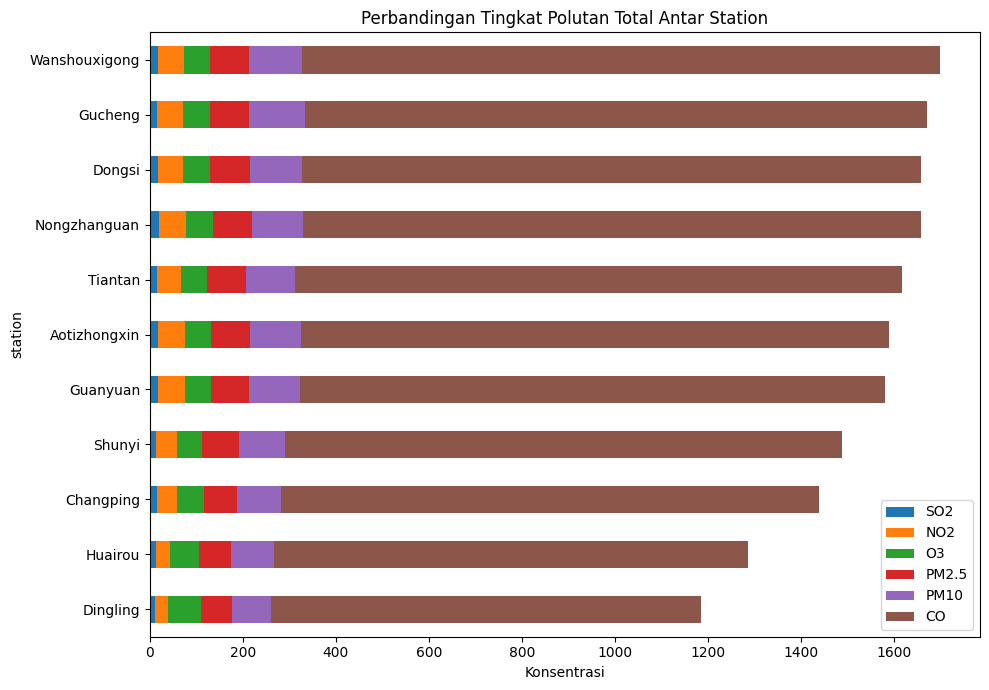

In [566]:
# Mendifinikan variabel
pollutants = ['SO2', 'NO2', 'O3', 'PM2.5', 'PM10', 'CO']
stations = ['Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

# Groupby 'station' dan hitung rata-rata untuk setiap polutan
grouped = all_df.groupby('station')[pollutants].mean()

# Mengurutkan data berdasarkan total polutan
grouped['total'] = grouped.sum(axis=1)
grouped = grouped.sort_values('total', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

# Plot gabungan dengan urutan station dari yang terbesar
grouped[pollutants].plot(kind='barh', stacked=True, ax=ax, title='Perbandingan Tingkat Polutan Total Antar Station')
ax.set_xlabel('Konsentrasi')
ax.invert_yaxis()  # Membalik urutan station

plt.tight_layout()
plt.show()


Explanatory Analysis:
* Metode analisis yang digunakan di sini adalah analisis deskriptif, karena grafik ini memberikan gambaran umum tentang tingkat polutan di setiap stasiun.
* Stasiun Wanshouxigong memiliki tingkat polutan total jauh lebih tinggi dibandingkan stasiun lain
* Stasiun Dingling memiliki tingkat polutan yang paling rendah dibandingkan stasiun lain
* Polutan Karbon Monoksida (CO) memiliki konsentrasi yang paling tinggi
* Polutan Sulfur Dioksida (SO2) memiliki konsentrasi yang paling rendah



### Pertanyaan 2: Bagaimana perbandingan tiap polutan pada tiap stasiun?

Metode analisis yang digunakan di sini adalah analisis deskriptif, karena grafik ini memberikan gambaran umum tentang tingkat tiap polutan di setiap stasiun.

#### Polutan SO2 (Sulfur Dioksida)

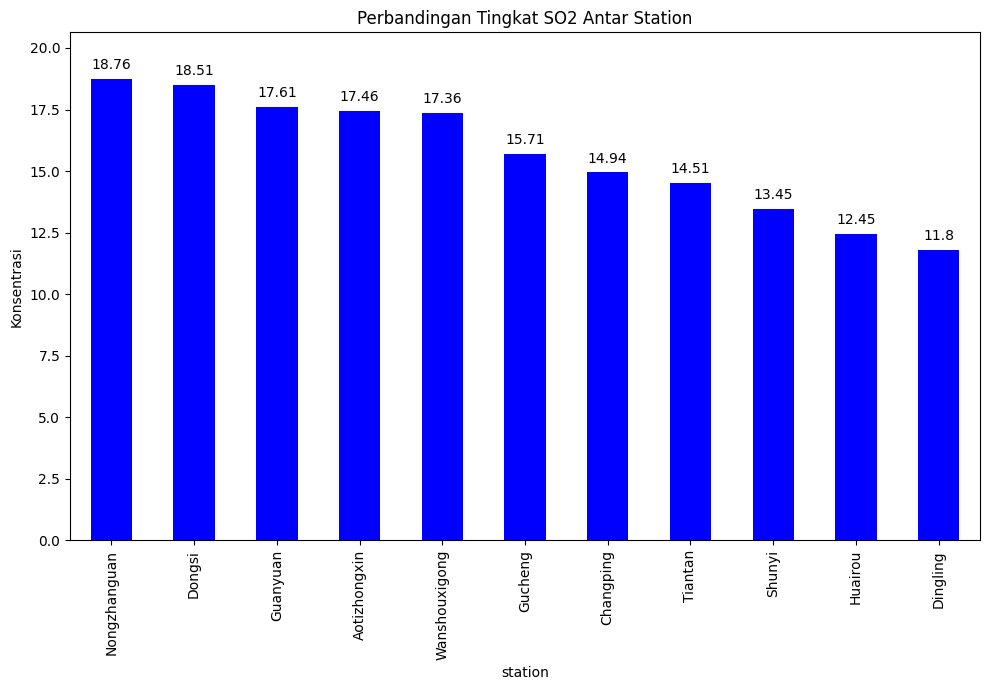

In [567]:
# Plot untuk SO2
fig, ax = plt.subplots(figsize=(10, 7))
grouped['SO2'].sort_values(ascending=False).plot(kind='bar', color='b', ax=ax, title='Perbandingan Tingkat SO2 Antar Station')
ax.set_ylim([0, grouped['SO2'].max() * 1.1])  # Meningkatkan tinggi sumbu y
ax.set_ylabel('Konsentrasi')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

Explanatory Analysis:
* Konsentrasi polutan Sulfur Dioksida paling tinggi berada pada stasiun Nongzhanguan
* Konsentrasi polutan Sulfur Dioksida paling rendah berada pada stasiun Dingling

#### Polutan NO2 (Nitrogen Dioksida)

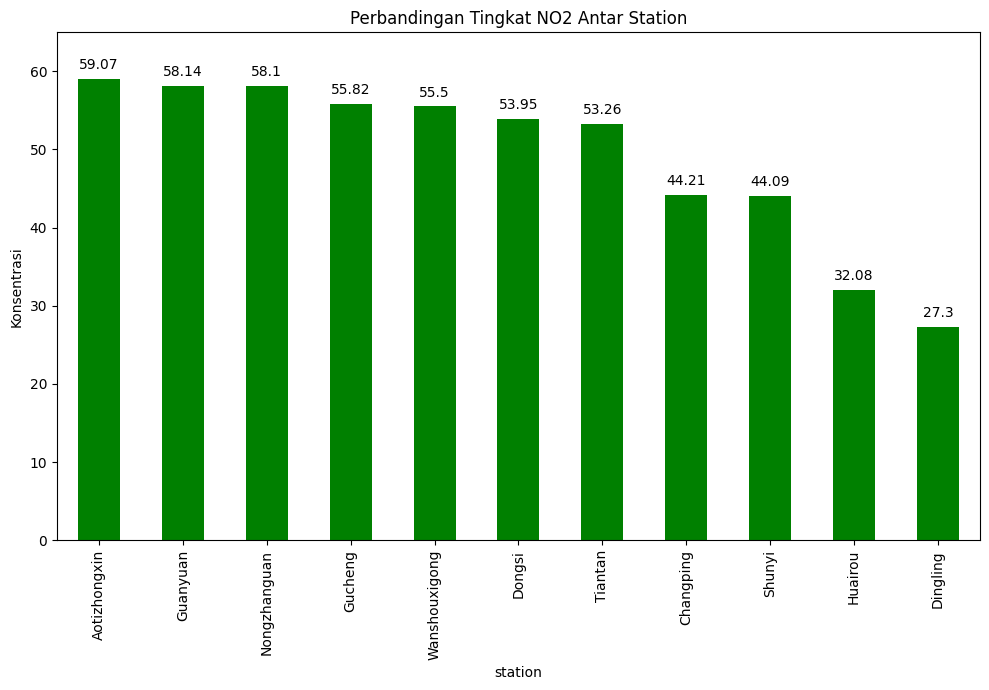

In [568]:
# Plot untuk NO2
fig, ax = plt.subplots(figsize=(10, 7))
grouped['NO2'].sort_values(ascending=False).plot(kind='bar', color='g', ax=ax, title='Perbandingan Tingkat NO2 Antar Station')
ax.set_ylim([0, grouped['NO2'].max() * 1.1])  # Meningkatkan tinggi sumbu y
ax.set_ylabel('Konsentrasi')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

Explanatory Analysis:
* Konsentrasi polutan Nitrogen Dioksida paling tinggi berada pada stasiun Wanliu
* Konsentrasi polutan Nitrogen Dioksida paling rendah berada pada stasiun Dingling

#### Polutan O3 (Ozon)

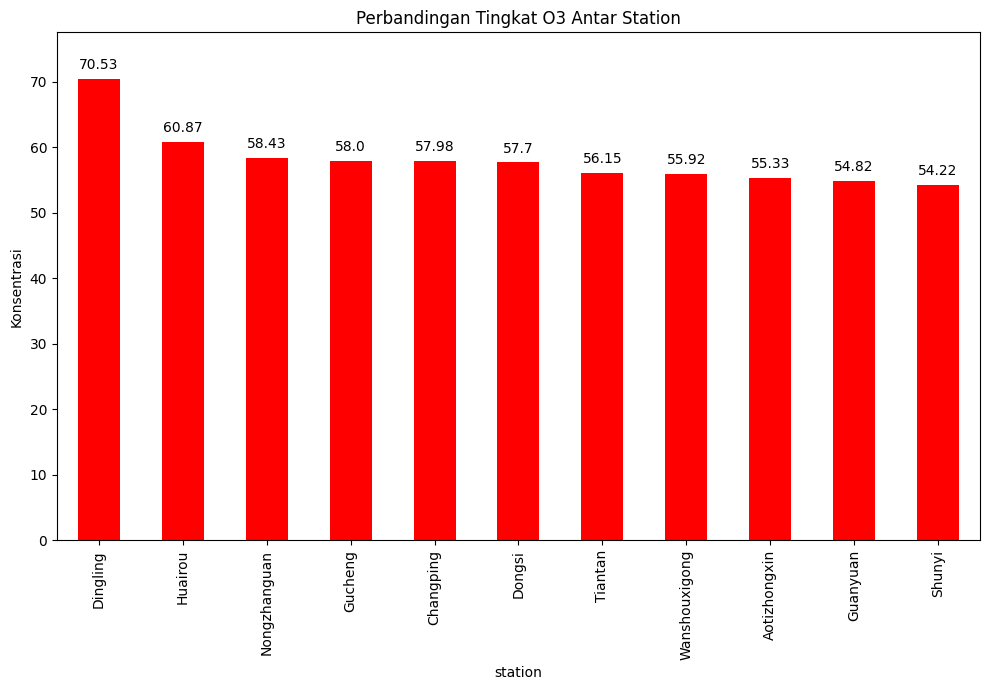

In [569]:
# Plot untuk O3
fig, ax = plt.subplots(figsize=(10, 7))
grouped['O3'].sort_values(ascending=False).plot(kind='bar', color='r', ax=ax, title='Perbandingan Tingkat O3 Antar Station')
ax.set_ylim([0, grouped['O3'].max() * 1.1])  # Meningkatkan tinggi sumbu y
ax.set_ylabel('Konsentrasi')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

Explanatory Analysis:

* Konsentrasi polutan Ozon paling tinggi berada pada stasiun Dingling
* Konsentrasi polutan Nitrogen Dioksida paling rendah berada pada stasiun Wanliu

#### Polutan PM2.5 (Partikulat 2.5μm)

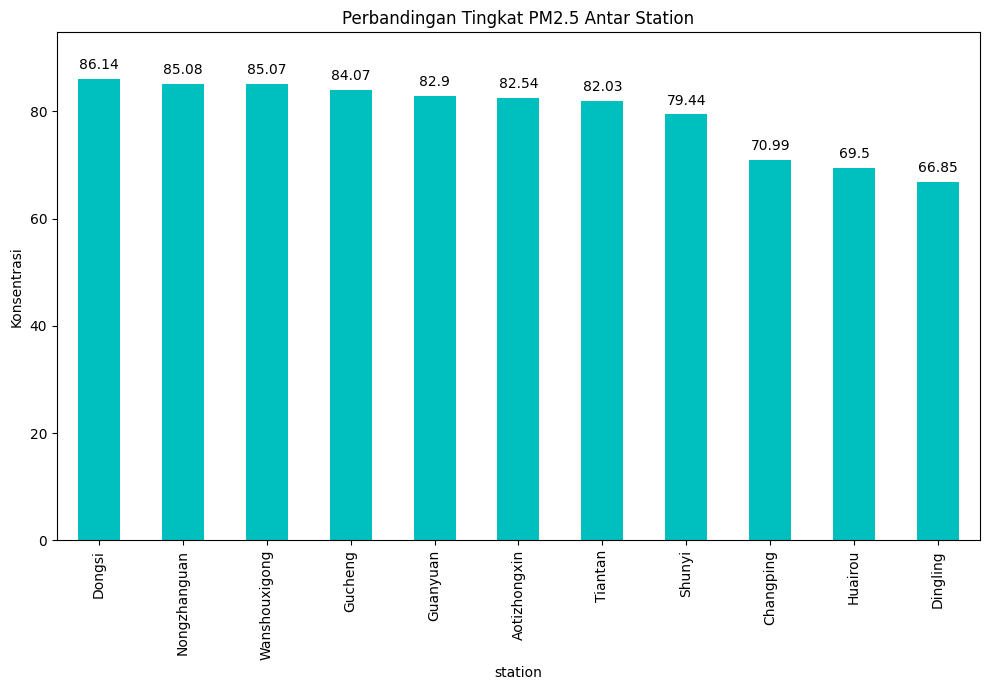

In [570]:
# Plot untuk PM2.5
fig, ax = plt.subplots(figsize=(10, 7))
grouped['PM2.5'].sort_values(ascending=False).plot(kind='bar', color='c', ax=ax, title='Perbandingan Tingkat PM2.5 Antar Station')
ax.set_ylim([0, grouped['PM2.5'].max() * 1.1])  # Meningkatkan tinggi sumbu y
ax.set_ylabel('Konsentrasi')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


Explanatory Analysis:

* Konsentrasi polutan Partikulat 2.5μm paling tinggi berada pada stasiun Dongsi
* Konsentrasi polutan Partikulat 2.5μm paling rendah berada pada stasiun Dingling

#### Polutan PM10 (Partikulat 10μm)

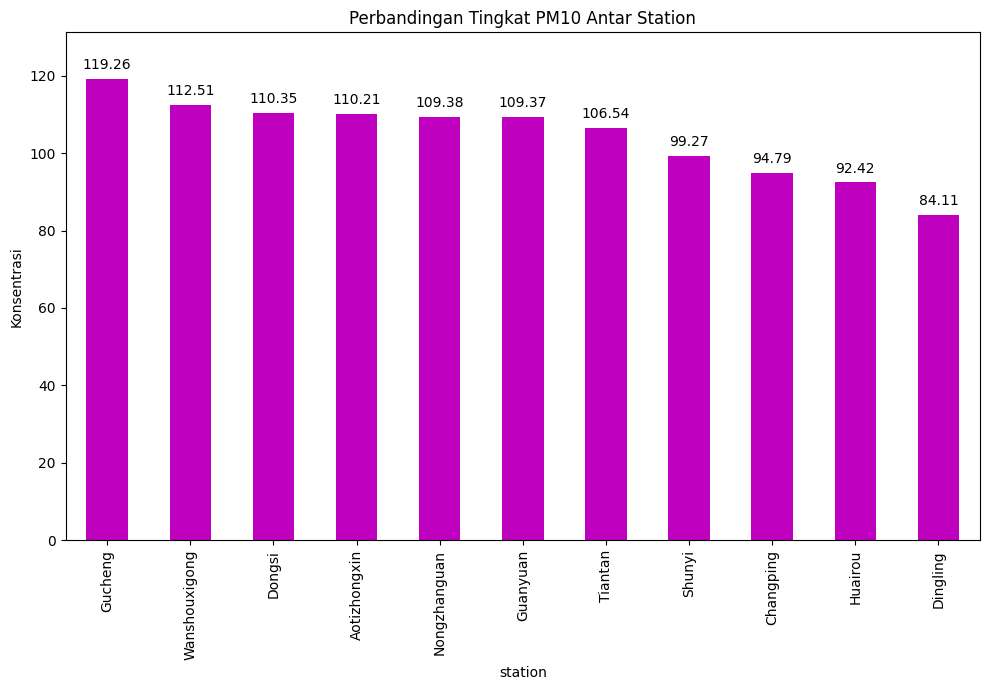

In [571]:
# Plot untuk PM10
fig, ax = plt.subplots(figsize=(10, 7))
grouped['PM10'].sort_values(ascending=False).plot(kind='bar', color='m', ax=ax, title='Perbandingan Tingkat PM10 Antar Station')
ax.set_ylim([0, grouped['PM10'].max() * 1.1])  # Meningkatkan tinggi sumbu y
ax.set_ylabel('Konsentrasi')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


Explanatory Analysis:

* Konsentrasi polutan Partikulat 10μm paling tinggi berada pada stasiun Gucheng
* Konsentrasi polutan Partikulat 10μm paling rendah berada pada stasiun Dingling

#### Polutan CO (Karbon Monoksida)

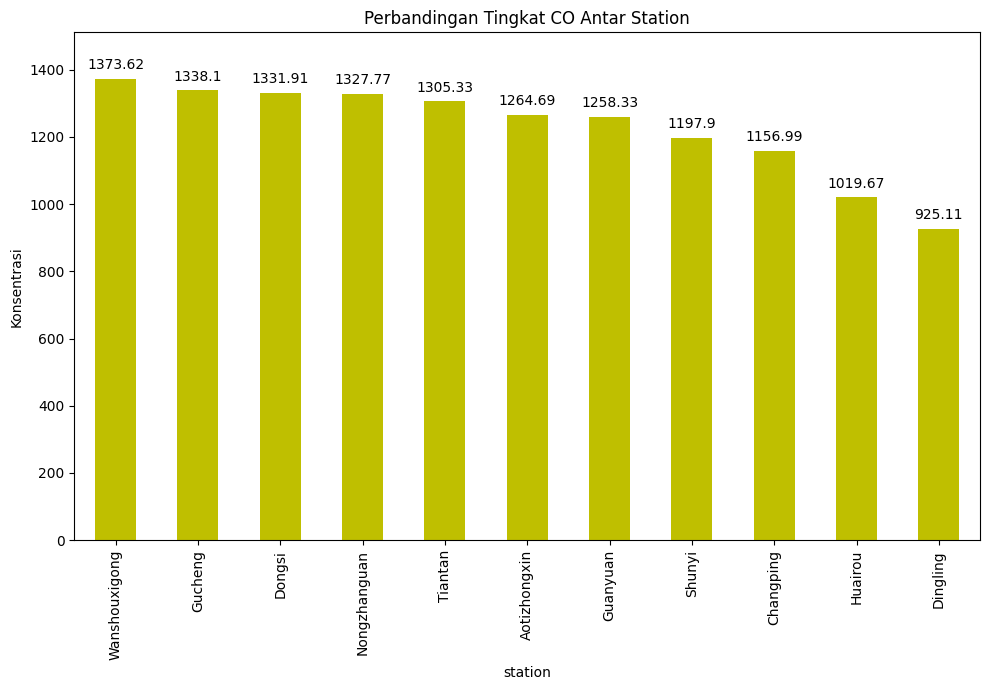

In [572]:
# Plot untuk CO
fig, ax = plt.subplots(figsize=(10, 7))
grouped['CO'].sort_values(ascending=False).plot(kind='bar', color='y', ax=ax, title='Perbandingan Tingkat CO Antar Station')
ax.set_ylim([0, grouped['CO'].max() * 1.1])  # Meningkatkan tinggi sumbu y
ax.set_ylabel('Konsentrasi')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


Explanatory Analysis:

* Konsentrasi polutan Karbon Monoksida paling tinggi berada pada stasiun Wanshouxigong
* Konsentrasi polutan Karbon Monoksida paling rendah berada pada stasiun Dingling

### Pertanyaan 3: Bagaimana pengaruh kondisi lingkungan terhadap tingkat polutan?

#### Pengaruh curah hujan terhadap kadar CO (Karbon Monoksida)

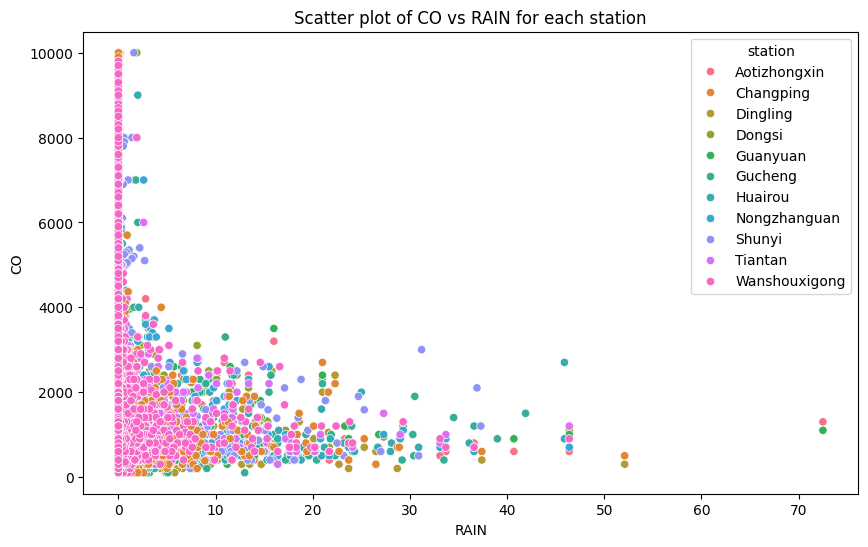

In [573]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_df, x='RAIN', y='CO', hue='station')
plt.title('Scatter plot of CO vs RAIN for each station')
plt.show()

Explanatory Analysis:
* Metode analisis yang digunakan di sini adalah metode korelasi untuk mengetahui sejauh mana hubungan antara dua variabel. Dalam hal ini kita menghitung koefisien korelasi antara RAIN dan CO untuk setiap stasiun.
* Titik-titik data cenderung berkumpul di bagian bawah grafik, menunjukkan bahwa kadar CO lebih tinggi ketika curah hujan rendah.

#### Pengaruh temperatur terhadap kadar O3 (Ozon)

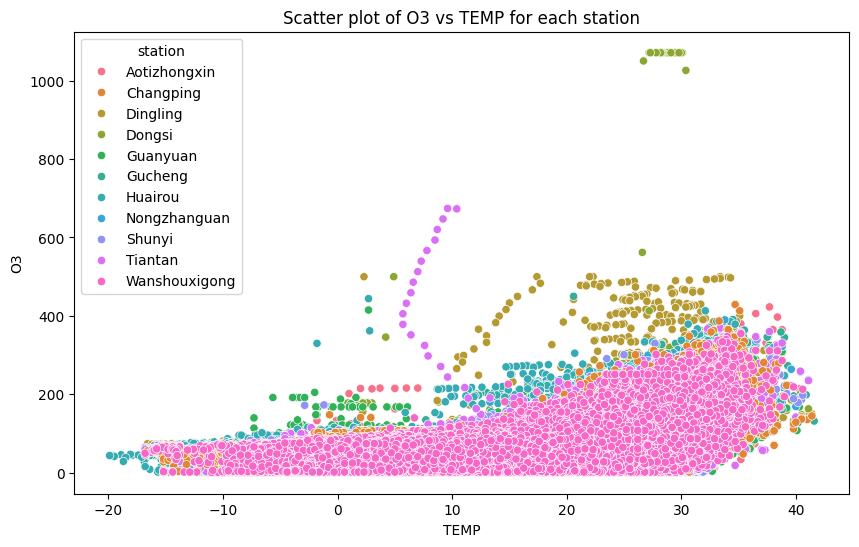

In [574]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_df, x='TEMP', y='O3', hue='station')
plt.title('Scatter plot of O3 vs TEMP for each station')
plt.show()

Explanatory Analysis:
* Metode analisis yang digunakan di sini sama seperti sebelumnya yaitu metode korelasi untuk mengetahui sejauh mana hubungan antara dua variabel. Dalam hal ini kita menghitung koefisien korelasi antara RAIN dan CO untuk setiap stasiun.
* Dari plot ini, kita bisa melihat bahwa seiring dengan peningkatan suhu, konsentrasi ozon juga cenderung meningkat, meskipun ada beberapa variasi tergantung pada stasiun pengukuran.

### Pertanyaan 4: Bagaimana fluktuasi tingkat polutan sepanjang waktu?

Metode analisis yang digunakan di sini adalah metode time series untuk menganalisis tren dan pola musiman dalam tingkat polutan di setiap stasiun.

#### Fluktuasi Karbon Monoksida sepanjang waktu

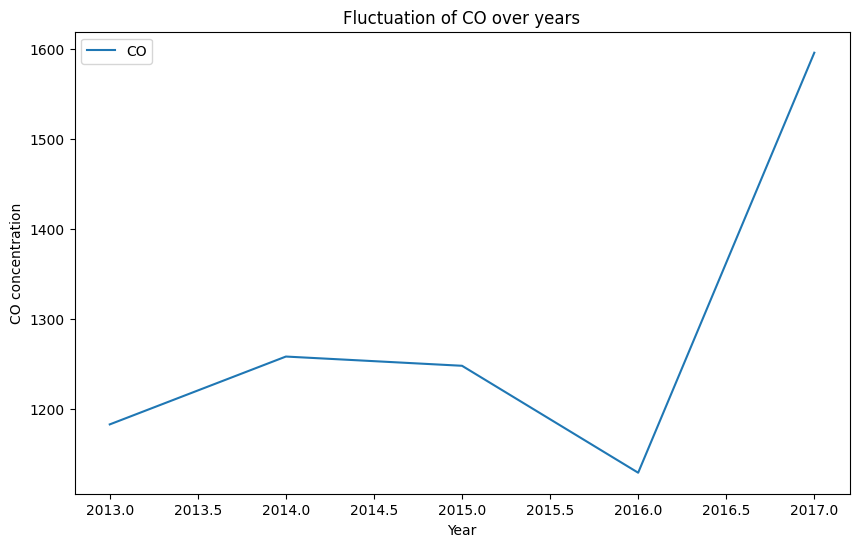

In [575]:
plt.figure(figsize=(10, 6))

# Buat line chart untuk CO
all_df.groupby('year')['CO'].mean().plot(label='CO')

plt.title('Fluctuation of CO over years')
plt.xlabel('Year')
plt.ylabel('CO concentration')
plt.legend()
plt.show()

Explanatory Analysis:
* Dari tahun 2013 hingga sekitar pertengahan 2016, konsentrasi CO relatif stabil dengan sedikit penurunan.
* Setelah pertengahan 2016, terjadi peningkatan tajam dalam konsentrasi CO.

#### Fluktuasi polutan lain sepanjang waktu

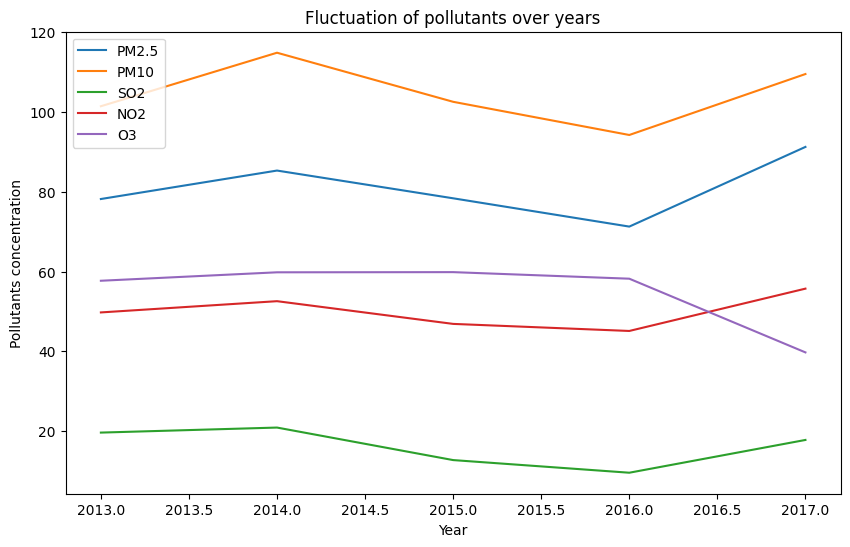

In [576]:
# Daftar variabel polutan kecuali CO
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']

plt.figure(figsize=(10, 6))

# Buat line chart untuk setiap polutan
for pollutant in pollutants:
    all_df.groupby('year')[pollutant].mean().plot(label=pollutant)

plt.title('Fluctuation of pollutants over years')
plt.xlabel('Year')
plt.ylabel('Pollutants concentration')
plt.legend()
plt.show()


Explanatory Analysis:
* Seluruh polutan kecuali Ozon (O3) mengalami sedikit penurunan pada tahun 2014 sampai 2016 hingga akhirnya nilainya meningkat kembali pada pertengahan tahub 2016 sampai tahun 2017
* Konsentrasi ozon cenderung stabil pada tahun 2013 sampai 2016 dengan penurunan pada tahun 2016 hingga 2017

### Pertanyaan 5: Bagaimana distribusi stasiun berdasarkan tingkat polutan dan kondisi lingkungan? (Cluster)

Metode analisis yang digunakan di sini adalah metode kluster untuk mengelompokkan stasiun berdasarkan tingkat polutan mereka, Anda dapat menggunakan teknik klastering. Metode ini akan mengidentifikasi stasiun yang memiliki tingkat polutan yang serupa.


In [577]:
all_df = pd.get_dummies(all_df, columns=['wd'])


In [578]:
# Pilih fitur yang akan digunakan untuk clustering
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM',
            'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S',
            'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW']
X = all_df[features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah cluster
n_clusters = 3

# Lakukan clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
all_df['cluster'] = kmeans.fit_predict(X_scaled)

# Cetak hasil clustering
for i in range(n_clusters):
    print(f"Cluster {i}:")
    print(all_df[all_df['cluster'] == i])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
           No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  ...  \
180       181  2013      3    8    12  104.0  194.0  37.0  101.0  1399.0  ...   
181       182  2013      3    8    13  121.0  225.0  40.0   96.0  1300.0  ...   
186       187  2013      3    8    18   82.0  128.0  55.0   63.0   900.0  ...   
188       189  2013      3    8    20   91.0  104.0  48.0   65.0  1000.0  ...   
189       190  2013      3    8    21   81.0   87.0  43.0   61.0  1100.0  ...   
...       ...   ...    ...  ...   ...    ...    ...   ...    ...     ...  ...   
418119  32416  2016     11   10    15  191.0  191.0  10.0   56.0  1300.0  ...   
418166  32463  2016     11   12    14   84.0  143.0  20.0   67.0  1600.0  ...   
418167  32464  2016     11   12    15   81.0  138.0  17.0   57.0  1400.0  ...   
418168  32465  2016     11   12    16   86.0  138.0  14.0   70.0  1400.0  ...   
418169  32466  2016     11   12    17   90.0  156.0   9.0   76.0  1400.0  ...   

        wd_NW  w

Dengan kode di atas, sekarang kita memiliki kolom 'cluster' dalam DataFrame yang menunjukkan cluster mana setiap stasiun termasuk berdasarkan tingkat polutan dan kondisi lingkungan. Scatter plot menunjukkan distribusi stasiun berdasarkan tingkat PM2.5 dan PM10, dengan warna yang menunjukkan cluster.

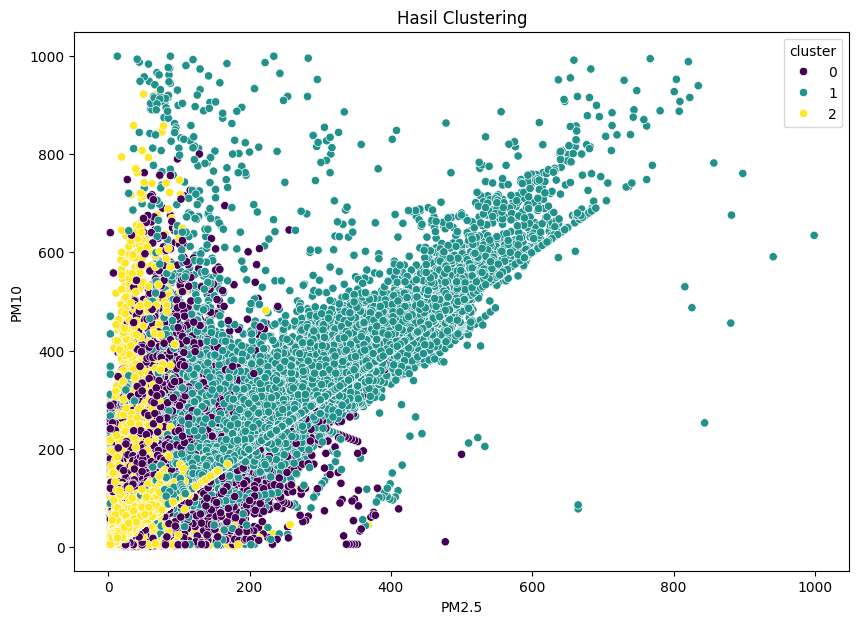

In [579]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(data=all_df, x='PM2.5', y='PM10', hue='cluster', palette='viridis')
plt.title('Hasil Clustering')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

Explanatory Analysis:
* Cluster 2 (Kuning): Stasiun dalam cluster ini memiliki tingkat PM2.5 dan PM10 yang relatif rendah. Hal ini menunjukkan bahwa stasiun-stasiun ini berada di area dengan kualitas udara yang lebih baik atau kurang terpengaruh oleh sumber polusi.
* Cluster 0 (Ungu): Stasiun dalam cluster ini memiliki tingkat PM2.5 yang rendah hingga menengah dan tingkat PM10 yang menengah. Hal ini menunjukkan bahwa stasiun-stasiun ini berada di area yang memiliki beberapa sumber polusi, tetapi tidak sebanyak stasiun dalam cluster 2.
* Cluster 1 (Hijau): Stasiun dalam cluster ini memiliki tingkat PM2.5 dan PM10 yang relatif tinggi. Hal ini menunjukkan bahwa stasiun-stasiun ini berada di area dengan banyak sumber polusi atau kondisi yang mengarah pada penumpukan polutan.

## Conclusion

- Conclution pertanyaan 1 (Bagaimana perbandingan tingkat polutan total antar stasiun?) **Jawab:**
Stasiun Wanshouxigong memiliki tingkat polutan total jauh lebih tinggi dibandingkan stasiun lain, sedangkan Dingling memiliki tingkat polutan yang paling rendah.
- Conclution pertanyaan 2 (Bagaimana perbandingan tiap polutan pada tiap stasiun?) **Jawab:** Stasiun Dingling cenderung memiliki konsentrasi rendah pada tiap polutan dibadingkan stasiun lain.
- Conclution pertanyaan 3 (Bagaimana pengaruh kondisi lingkungan terhadap tingkat polutan?) **Jawab:** Kondisi lingkungan seperti curah hujan dan temperatur mempengaruhi konsentrasi polutan.
- Conclution pertanyaan 4 (Bagaimana fluktuasi tingkat polutan sepanjang waktu?) **Jawab:** Hampir seluruh polutan mengalami fluktuasi sepanjang waktu kecuali O3 atau ozon.
- Conclution pertanyaan 5 (Bagaimana distribusi stasiun berdasarkan tingkat polutan dan kondisi lingkungan? (Cluster)) **Jawab:** Stasiun yang berkategori cluster 2 menunjukkan konsentrasi polutan paling tinggi dibandingkan stasiun cluster lainnya.

Menyimpan berkas data yang telah dibersihkan

In [580]:
all_df.to_csv("all_data.csv", index=False)